In [1]:
from __future__ import division

In [2]:
import numpy as np
import scipy.stats as stats

%matplotlib inline
from matplotlib import style as mstyle
mstyle.use('ggplot')
import matplotlib.pyplot as plt

### Generalized normal distribution

$$
\mathrm{pdf}(x, b) \propto \exp\left( - \frac{|x|^b}{2} \right)
$$

In [3]:
# Unnormalized pdf. 
# `loc` and `scale` parameters a la scipy.stats distributions.

def pdf(x, b=2, loc=0, scale=1):
    y = (x - loc) / scale
    return np.exp(-np.abs(y)**b / 2.)

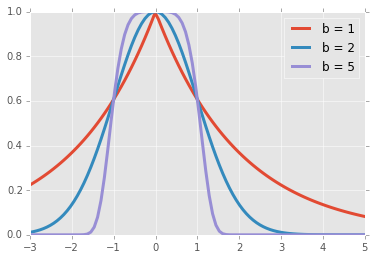

In [4]:
x = np.linspace(-3, 5, 100)
for a in [1, 2, 5]:
    plt.plot(x, pdf(x, a), lw=3, label='b = %d ' % a)
plt.legend()

Sampling from a distribution: either invert the CDF (hard), or use rejection sampling.

In [5]:
# Try rejection sampling in the box with x=[-3, 5].
np.random.seed(1234)

n_samp = 1000

xv = stats.uniform().rvs(size=n_samp) * 8 - 3
yv = stats.uniform().rvs(size=n_samp)

# rejection criterion
mask = yv < pdf(xv, b=3)

sample = xv[mask]

In [6]:
sample.size / xv.size

0.273

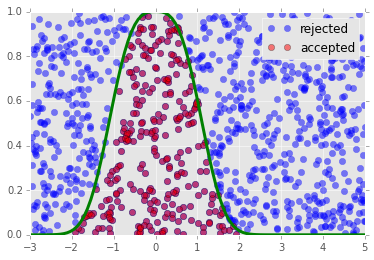

In [19]:
plt.plot(xv, yv,
         'bo', mec='b', alpha=0.5, label='rejected')
plt.plot(xv[mask], yv[mask],
         'ro', alpha=0.5, label='accepted')

plt.plot(x, pdf(x, b=3), 'g-', lw=3)
plt.legend()

In [8]:
from scipy.integrate import quad

$$\int_{-\infty}^\infty \mathrm{pdf(x, 3)}\,dx$$

In [9]:
const, err = quad(pdf, -np.inf, np.inf, args=(3,))

In [10]:
const, err

(2.250167367501879, 7.865194194822144e-09)

In [21]:
quad(lambda x: pdf(x, 3), -np.inf, np.inf)

(2.250167367501879, 7.865194194822144e-09)

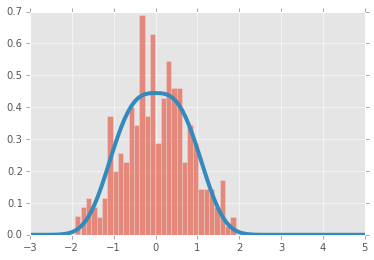

In [11]:
plt.hist(xv[mask], normed=True, bins=30, alpha=0.6)
plt.plot(x, pdf(x, 3) / const, lw=4)

#### Alternatively, inverse interpolation

Construct an approximation to the CDF and interpolate.

In [12]:
# Chebyshev nodes
n_pts = 100
xmax = 2.5

xj = 2.*np.arange(n_pts) + 1
xj = np.cos(xj * np.pi *.5 / n_pts)
xj = xj[::-1] *xmax

In [13]:
# Approximate the CDF on the Cheb nodes

yj = pdf(xj[:-1], b=3)
dx = xj[1:] - xj[:-1]
cdfs = np.cumsum(yj * dx)
cdfs /= cdfs[-1]    # poor man's normalization
xj = xj[:-1]

In [14]:
from scipy.interpolate import BPoly

In [15]:
inv_cdf = BPoly.from_derivatives(cdfs, 
                                 xj.reshape(-1, 1))

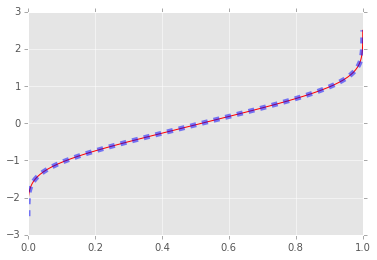

In [16]:
plt.plot(cdfs, xj, 'r-')
plt.plot(cdfs, inv_cdf(cdfs), 'b--', lw=5, alpha=0.5)

In [17]:
## sample from the tabulated distribution
n_samp

1000

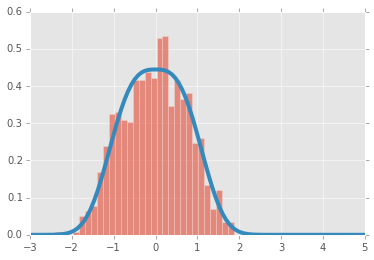

In [18]:
samples = inv_cdf(stats.uniform.rvs(size=n_samp))

plt.hist(samples, normed=True, bins=30, alpha=0.6)
plt.plot(x, pdf(x, 3) / const, lw=4)